### Koch Snowflake

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto

Using matplotlib backend: MacOSX


In [2]:
def q3(p1,p2): #trisector

    return ([(p1[0]+p2[0])/3,(p1[1]+p2[1])/3])

In [3]:
def kochmore(p1,p2,n):
    
    #input two point of a line [p1,p2], and depth of koch n
    #returns two points of line with length koched to depth n
    
    if n == 0:
        return [p1,p2]
    else:
        p3 = q3(p1,p2)
        p = kochmore(p1,p3,n-1)
    
    return p

In [4]:
def rotater(pn,po,an):  

    # inputs point on function pn, point of rotation po, and angle of rotation an
    # returns function rotated along po at angle an
    
    pt = np.empty(np.shape(pn))
    for i in range(len(pt[:,0])):
        pt[i,0] = (pn[i,0]-po[0])*np.cos(an) - (pn[i,1]-po[1])*np.sin(an) + po[0]
        pt[i,1] = (pn[i,0]-po[0])*np.sin(an) + (pn[i,1]-po[1])*np.cos(an) + po[1]
   
    return pt

In [5]:
def angles(n):
    
    #input depth of koch n
    #returns array of angles corresponding to each side
    
    z=[]
    if n==0:
        return []
    if n==1:
        z.extend( [1.0472,-2.0944,1.0472])
    else:
        for i in angles(n-1):
            c = angles(1)
            c.append(i)
            z.extend(c)
        z.extend(angles(1))

    return z

In [6]:
def power(n):
    
    #input depth of koch n
    #returns number of sides per side of base triangle
    
    if n==0:
        return 1
    else:
        return power(n-1)*4

In [7]:
def general(a,b,n):
    
    #two points of a line corresponding to side of a triangle a and b, and depth of koch n
    #retturns koch snowflake of depth (n)
    
    x = (kochmore(a,b,n))
    
    fin = [] + x
    y = []
    i = 1
    while i <= power(n) * 3:
        for k in angles(n) + [-2.0944]:
            x = np.array(x)
            if i % 2 == 0 or n == 0:
                y = (rotater (x,x[len(x) - 1],k))
            elif i % 2 == 1 :
                y = rotater (x,x[0],k)
                
            dx = abs(x[len(x) - 1,0] - y[0,0])
            dy = abs(x[len(x) - 1,1] - y[0,1])
            
            if y[0,0] > x[len(x)-1,0]:
                y[:,0] = np.subtract(y[:,0],dx)
            elif y[0,0] < x[len(x)-1,0]:
                y[:,0] = np.add(y[:,0],dx)
            
            if y[0,1] > x[len(x)-1,1]:
                y[:,1] = np.subtract(y[:,1],dy)
            elif y[0,1] < x[len(x)-1,1]:
                y[:,1] = np.add(y[:,1],dy)
        
            y = y.tolist()
            fin = fin + y
            i += 1

            x = y


    fin = np.array(fin)
    plt.plot(fin[:,0],fin[:,1])
    plt.show()          

In [8]:
## points of side triangle
a = [0,0]
b = [0,100]

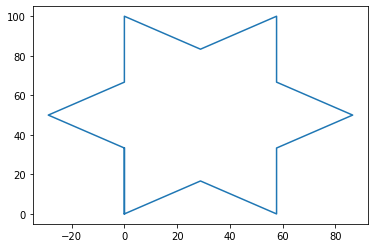

In [16]:
## MAIN
n = 1
general(a,b,n)    